<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/ejemplo/blob/main/Taller_de_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIVERSIDAD NACIONAL DE COLOMBIA

***TALLER LAPLACE:***

LUIS FERNANDO CASTRO BUCHELLY

c.c. 1122786100

## Análisis de un péndulo elástico amortiguado

- El [péndulo elástico](https://en.wikipedia.org/wiki/Spring_pendulum) amortiguado es un ejemplo de un sistema mecánico que puede ser modelado por una ecuación diferencial ordinaria lineal (EDO) con coeficientes constantes.

- Desde el punto de vista de la teoría de señales y sistemas, puede ser interpretado como un sistema lineal invariante en el tiempo (SLIT).

- Las propiedades mecánicas del péndulo elástico amortiguado se analizan utilizando la teoría de los SLIT. La configuración mecánica subyacente se muestra en la siguiente figura:

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

- Un cuerpo rígido de masa $m$ está montado sobre un resorte con rigidez $k$ que está conectado al suelo.

- Un amortiguador con un coeficiente de amortiguamiento $c$ se monta paralelo al resorte para modelar la fricción presente en el sistema.

- Se asume que el movimiento de la masa a lo largo del tiempo está restringido al eje vertical, aquí indicado por $y$. Además, se asume que la masa no se mueve para $ t <0 $.

- Denotando el desplazamiento de la masa con respecto al tiempo con $y(t)$, las condiciones iniciales se formulan como $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

- Se utilizarán los siguientes valores $m = 0.1$,  $c = 0.1$ y $k = 2.5$ para ilustrar de manera más sencilla el siguiente ejemplo.

### Ecuación diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa:

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

Donde $F_\text{E}(t) $ denota una fuerza externa que actúa sobre la masa. La fuerza $F_\text{S}(t)$ inducida por el resorte está dada por la [ley de Hooke](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.

La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

### Comparación con la red eléctrica

Comparando las EDO del péndulo elástico amortiguado y el circuito RLC, se tiene que ambos constituyen una EDO de segundo orden con coeficientes constantes.

La división de la EDO del circuito por la constante $C$ resulta en:

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

Donde $u_\text{i}(t)$ y $u_\text{o}(t)$ denotan el voltaje de entrada y salida del circuito respesctivamente.

La comparación de la EDO anterior con la del péndulo elástico amortiguado produce [equivalencia entre sistemas](https://en.wikipedia.org/wiki/System_equivalence) así:

|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
| Señal de entrada $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$  | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| Señal de salida $y(t)$  | $u_\text{o}(t)$                    | $y(t)$                                    |
|                         | $L=m$                              | $m=L$                                     |
|                         | $R=c$                              | $c=R$                                     |
|                         | $C=\frac{1}{k}$                    | $k=\frac{1}{C}$                           |

### Respuesta al Impulso

El SLIT correspondiente al péndulo puede ser caracterizado por su respuesta al impulso $h(t)$. Se define como la salida del sistema ante una entra $x(t) = \delta(t)$ en la entrada. La respuesta al impulso caracteriza el movimiento $y(t)$ de la masa ante un evento.

Primero, se define la EDO del péndulo elástico amortiguado con `SymPy`

In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

Se guardan los valores de las constantes en un diccionario para posteriores sustituciones

In [3]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

{c: 1/10, k: 5/2, m: 0.1}

La respuesta al impulso se calcula al resolver la EDO

In [4]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                         ⎛        ____________⎞    ↪
             ⎛        ____________⎞          ⎛       ____________⎞       ⎜       ╱  2         ⎟    ↪
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟     t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠    ↪
           t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠       -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠     ────────────────────────    ↪
           ────────────────────────       ─────────────────────────              2⋅m               ↪
                     2⋅m                             2⋅m              ℯ                        ⋅θ( ↪
h(t) = C₁⋅ℯ                         + C₂⋅ℯ                          + ──────────────────────────── ↪
                                                                                ____________       ↪
                                                                               ╱  2                ↪
                                                                             ╲╱  c  - 4⋅k⋅m

Las constantes de integración $C_1$ y $C_2$ se determinan a partir de las condiciones iniciales $y(t) = 0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [5]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior, produce la respuesta al impulso del sistema mecánico

In [6]:
h = solution_h.subs(integration_constants)
h

          ⎛        ____________⎞            ⎛       ____________⎞      
          ⎜       ╱  2         ⎟            ⎜      ╱  2         ⎟      
        t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠         -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠      
        ────────────────────────         ─────────────────────────     
                  2⋅m                               2⋅m                
       ℯ                        ⋅θ(t)   ℯ                         ⋅θ(t)
h(t) = ────────────────────────────── - ───────────────────────────────
                 ____________                      ____________        
                ╱  2                              ╱  2                 
              ╲╱  c  - 4⋅k⋅m                    ╲╱  c  - 4⋅k⋅m         

Se grafica la respuesta para los valores de $m$, $c$ y $k$ definidas anteriormente

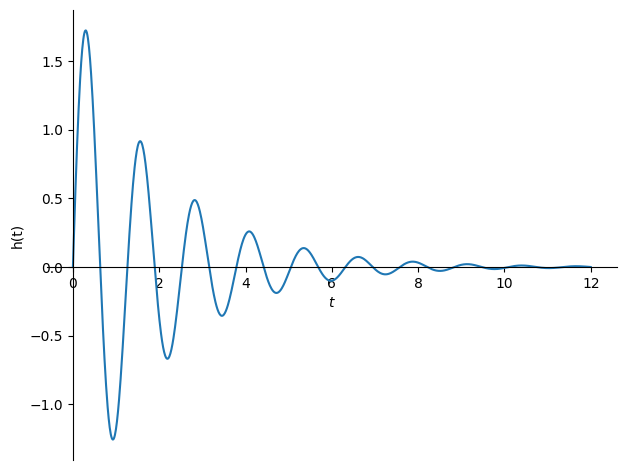

In [7]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

### Función de Transferencia

Para una señal exponencial de entrada $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la entrada, tal que $y(t) = H(s) \cdot e^{s t}$. La función de transferencia se obtiene al introducir $x(t)$ y $y(t)$ en la EDO y resolver para $H(s)$

In [8]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j\omega}=\cos(\omega t)+j\sin(\omega t)$ son de especial interés en el análisis de sistemas resonantes.

Se pueden derivar de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$. La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica.

In [9]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

       1        
────────────────
               2
ⅈ⋅c⋅ω + k - m⋅ω 

La magnitud de la función de transferencia $|H(j\omega)|$ se grafica para los valores de los parámetros dados anteriormente

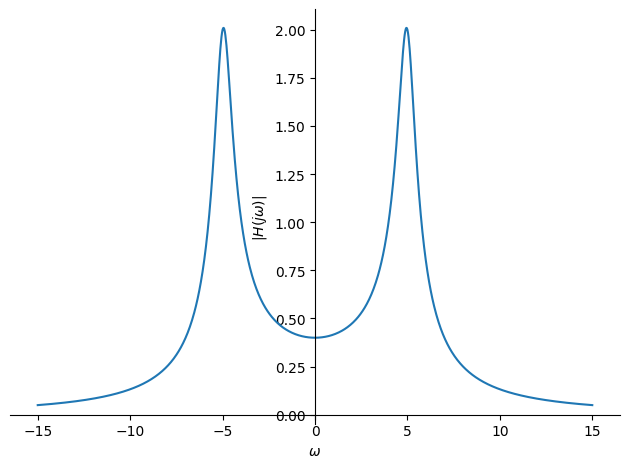

In [10]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Al inspeccionar la magnitud de la función de transferencia, se hace evidente que el péndulo del resorte amortiguado muestra resonancias (picos máximos) para dos frecuencias angulares específicas. Estas frecuencias de resonancia $\omega_0$ se calculan desde los valores extremos de $|H(j\omega)|$. Primero se calcula la derivada de $|H(j\omega)|$ con respecto a $\omega$ y luego se igual a cero

In [11]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

⎡         ____________        ____________⎤
⎢        ╱    2              ╱    2       ⎥
⎢       ╱    c              ╱    c        ⎥
⎢   -  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢    ╲╱      2           ╲╱      2        ⎥
⎢0, ───────────────────, ─────────────────⎥
⎣            m                   m        ⎦

Para los máximos de la función de transferencia solo es de interés el segundo y el tercer extremo

In [12]:
w0 = extrema[1:3]
w0

⎡      ____________        ____________⎤
⎢     ╱    2              ╱    2       ⎥
⎢    ╱    c              ╱    c        ⎥
⎢-  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢ ╲╱      2           ╲╱      2        ⎥
⎢───────────────────, ─────────────────⎥
⎣         m                   m        ⎦

Las frecuencias de resonancia se calculan para los valores de $m$, $c$ y $k$ dados anteriormente

In [13]:
[w00.subs(mck) for w00 in w0]

[-4.94974746830583, 4.94974746830583]

La fase de la función de transferencia $\varphi (j\omega)$ se calcula y grafica para los valores específicos de los elementos dados anteriormente

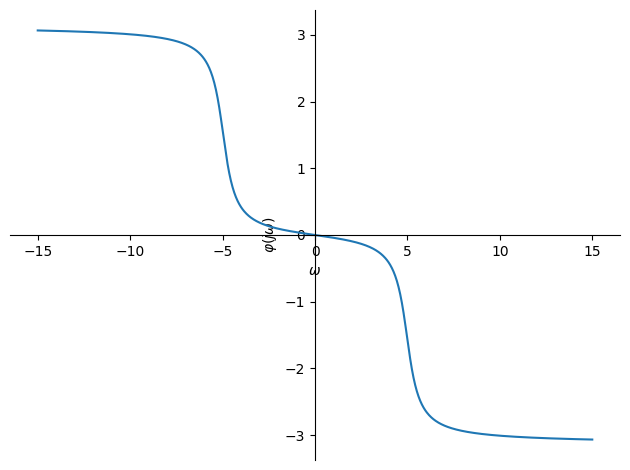

In [14]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

**PUNTO 2 Y 3**

Solución de SLIT segundo orden forma canónica utilizando transformada de Laplace en Sympy





In [15]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [16]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)
K = 1 #ganncia estatica
#Entrada de interés en Laplace
X = 1/s # X(s) = 1 Respuesta entrada al escalon;
#Forma canónica -> resolver según sistema propuesto
wn = 1/sym.sqrt(L*C) #frecuencia natural
xi = (R/2)*(sym.sqrt(C/L)) #factor amortiguamiento
H = (1/(s**2 + 2*xi*wn*s + 1)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H

     1      
────────────
 2       R⋅s
s  + 1 + ───
          L 

In [17]:
#calcular polos
p1 = ((-L/R) + sym.sqrt((L/R)**2-4*L*C))/(2*L*C)
p2 = ((-L/R) - sym.sqrt((L/R)**2-4*L*C))/(2*L*C)
p1

            _____________
           ╱           2 
  L       ╱           L  
- ─ +    ╱   -4⋅C⋅L + ── 
  R     ╱              2 
      ╲╱              R  
─────────────────────────
          2⋅C⋅L          

In [18]:
#Frecuencia Natrural Amortiguada
wd = wn*sym.sqrt(1-xi**2)
wd

     ____________
    ╱      2     
   ╱    C⋅R      
  ╱   - ──── + 1 
╲╱      4⋅L      
─────────────────
      √C⋅√L      

In [19]:

#Tiempo pico tp
tp = sym.pi/(wn*sym.sqrt(1-(xi**2)))
tp

     π⋅√C⋅√L     
─────────────────
     ____________
    ╱      2     
   ╱    C⋅R      
  ╱   - ──── + 1 
╲╱      4⋅L      

In [20]:
#Tiempo establecimiento
ts = 3/(xi*wn)
ts


6⋅L
───
 R 

In [21]:
def tiempo_levantamiento(wn, xi):
    """
    Calcula el tiempo de levantamiento (10%-90%) para un sistema de segundo orden
    con frecuencia natural wn y factor de amortiguamiento xi.
    """
    xi = float(xi)  # Convertir a número flotante para evitar problemas con SymPy

    if xi < 1:  # Sistema Subamortiguado
        wd = wn * np.sqrt(1 - xi**2)
        theta = np.arctan(np.sqrt(1 - xi**2) / xi)
        tr = (np.pi - theta) / wd

    elif xi > 1:  # Sistema Sobreamortiguado
        tr = 2.2 / (wn * (xi - np.sqrt(xi**2 - 1)))

    else:  # Sistema Críticamente Amortiguado (xi = 1)
        tr = 2.2 / wn

    return tr

**SISTEMA SUBAMORTIGUADO**

In [22]:
#evaluar valores RLC
RLC = {R: 0.1, L:('0.1'), C: ('0.1')}#valores utilizados para la simulación
H.subs(RLC)

      1       
──────────────
 2            
s  + 1.0⋅s + 1

In [23]:
print('p1=',p1.subs(RLC))
print('p2=',p2.subs(RLC))
print('xi=',xi.subs(RLC))
print('omega_n=',wn.subs(RLC))

p1= -1.01020514433644
p2= -98.9897948556636
xi= 0.0500000000000000
omega_n= 10.0000000000000


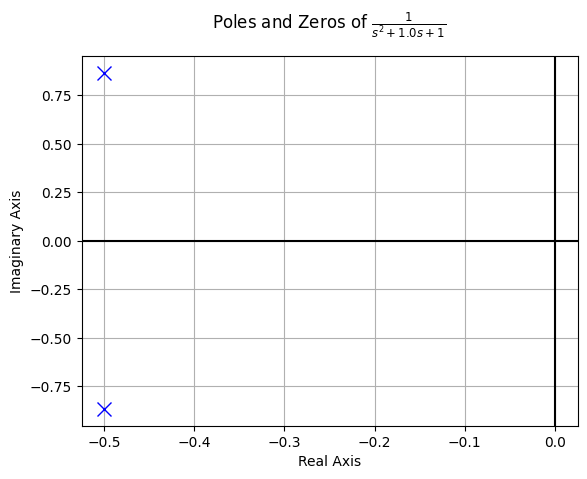

In [24]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

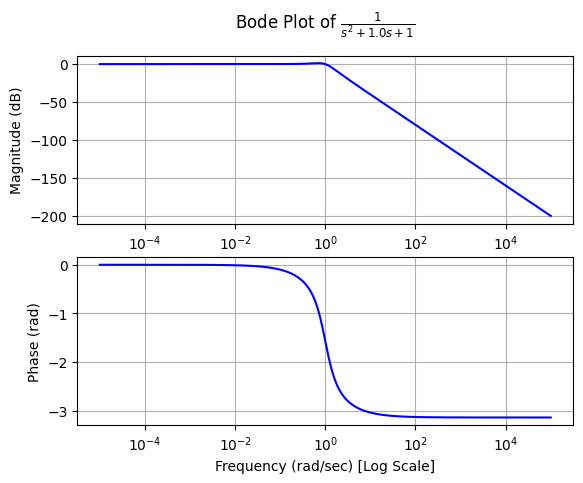

In [25]:
import sympy.physics.control as control
#Diagrma de Bode
control.bode_plot(tf1)

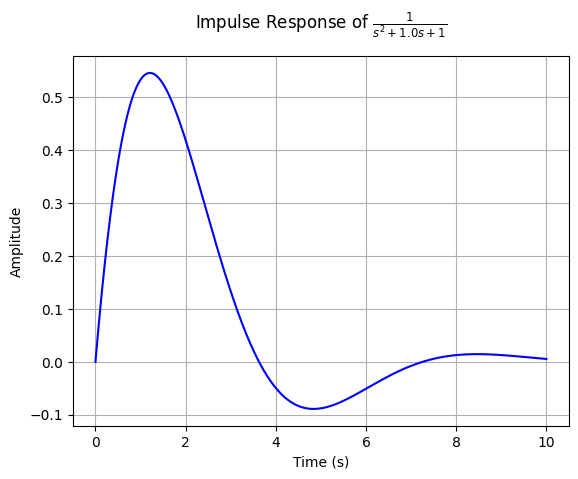

In [26]:
#Respuesta al Impulso
control.impulse_response_plot(tf1)

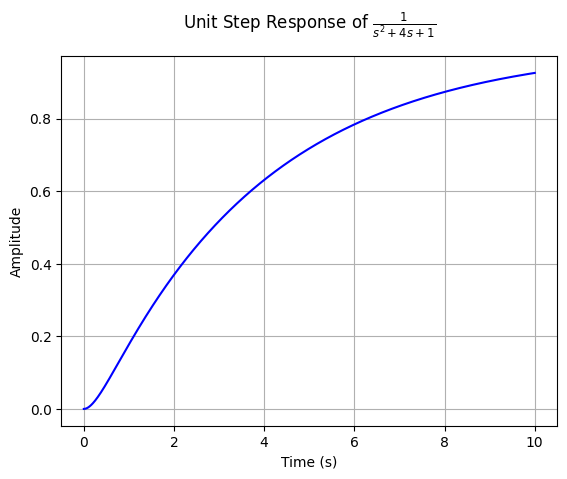

In [66]:
#Respuesta al Escalon
control.step_response_plot(tf1)

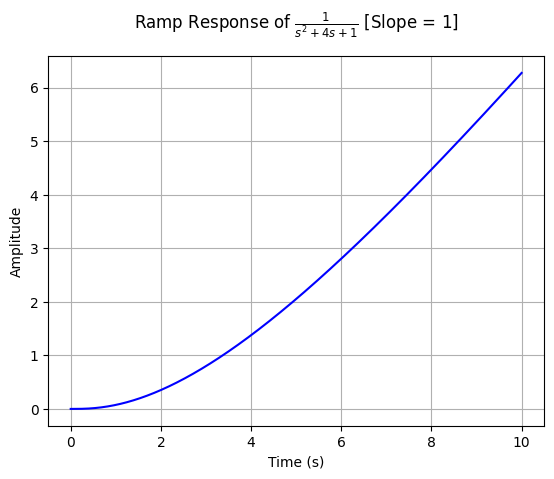

In [67]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

In [27]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

       1        
────────────────
  ⎛ 2       R⋅s⎞
s⋅⎜s  + 1 + ───⎟
  ⎝          L ⎠

In [28]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

     L⋅s + R       1
- ────────────── + ─
     2             s
  L⋅s  + L + R⋅s    

In [29]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

     -R⋅t     ⎛     ___________⎞                                            
     ─────    ⎜    ╱    2    2 ⎟                                            
      2⋅L     ⎜t⋅╲╱  4⋅L  - R  ⎟        -R⋅t                                
  R⋅ℯ     ⋅sin⎜────────────────⎟        ─────    ⎛    _________   _________⎞
              ⎝      2⋅L       ⎠         2⋅L     ⎜t⋅╲╱ 2⋅L - R ⋅╲╱ 2⋅L + R ⎟
- ────────────────────────────── + 1 - ℯ     ⋅cos⎜─────────────────────────⎟
             ___________                         ⎝           2⋅L           ⎠
            ╱    2    2                                                     
          ╲╱  4⋅L  - R                                                      

In [30]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


  1.0⋅(s + 1)   1.0
- ─────────── + ───
   2             s 
  s  + s + 1       

In [31]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

                            -t                   -t           
                            ───                  ───          
                             2     ⎛√3⋅t⎞         2     ⎛√3⋅t⎞
1.0 - 0.333333333333333⋅√3⋅ℯ   ⋅sin⎜────⎟ - 1.0⋅ℯ   ⋅cos⎜────⎟
                                   ⎝ 2  ⎠               ⎝ 2  ⎠

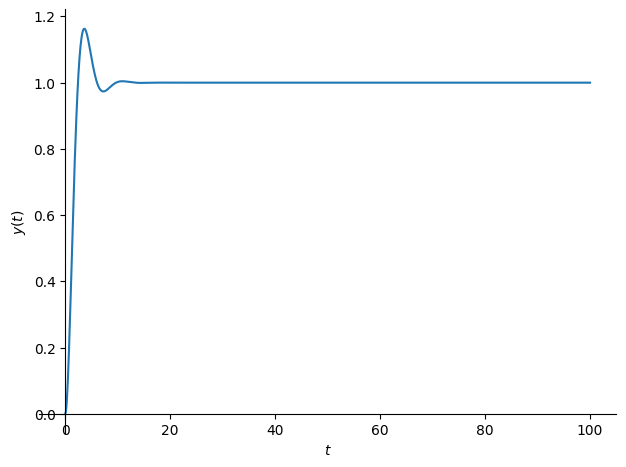

In [32]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((0.5/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

In [33]:
#Frecuencia  no Amortiguada
wn.subs(RLC)

10.0000000000000

In [34]:

#Frecuencia Amortiguada
wd.subs(RLC)


9.98749217771909

In [35]:
#Tiempo de levantamiento
z = xi.subs(RLC)
tr = tiempo_levantamiento(wn,z)
tr.subs(RLC)


0.162284701180194

In [36]:
#Tiempo Pico
tp.subs(RLC)

0.100125234864352⋅π

In [37]:
#Tiempo establecimiento
ts.subs(RLC)

6.00000000000000

**criticamente amortiguado**

In [38]:
#evaluar valores RLC
RLC = {R: 2, L:('1'), C:('1')}#valores utilizados para la simulación
H.subs(RLC)

     1      
────────────
 2          
s  + 2⋅s + 1

In [39]:
print('p1=',p1.subs(RLC))
print('p2=',p2.subs(RLC))
print('xi=',xi.subs(RLC))
print('omega_n=',wn.subs(RLC))

p1= -1/4 + sqrt(15)*I/4
p2= -1/4 - sqrt(15)*I/4
xi= 1
omega_n= 1


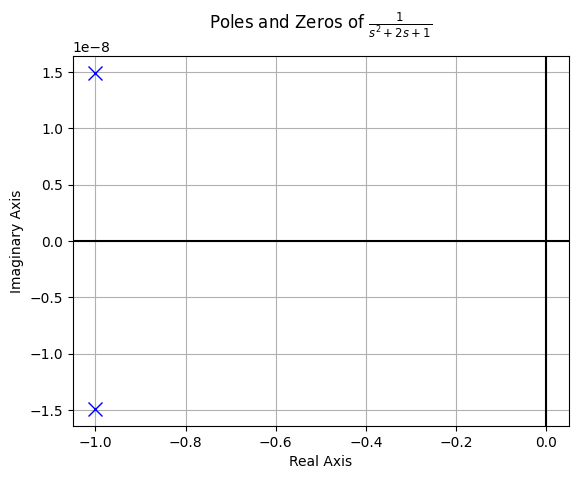

In [40]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

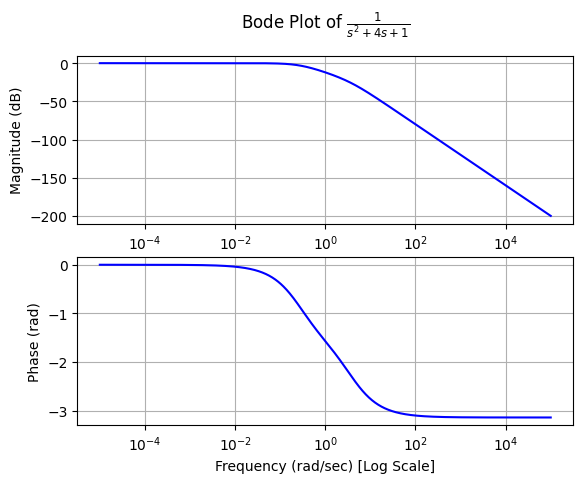

In [72]:
#Diagrma de Bode
control.bode_plot(tf1)

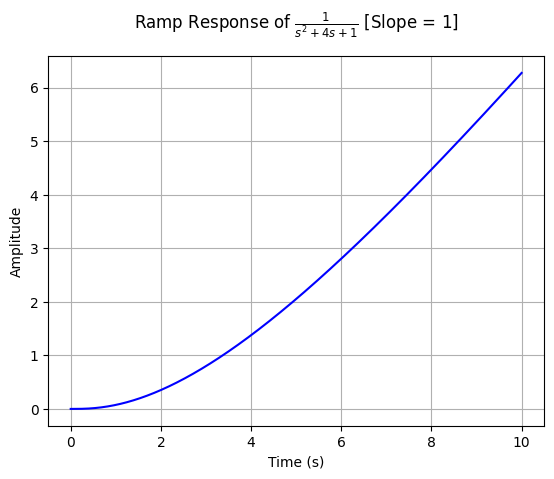

In [73]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

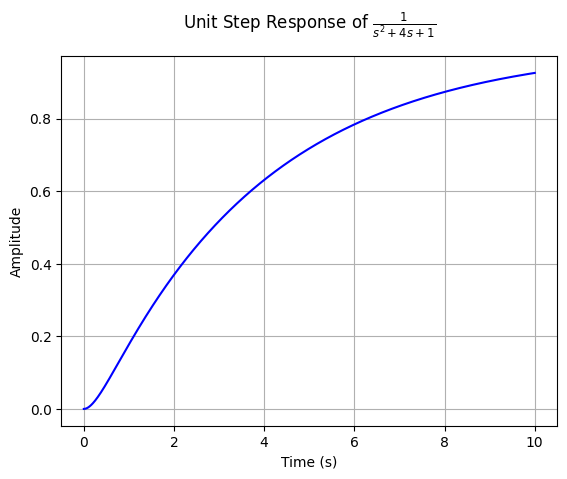

In [74]:
#Respuesta al Escalon
control.step_response_plot(tf1)

In [41]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

       1        
────────────────
  ⎛ 2       R⋅s⎞
s⋅⎜s  + 1 + ───⎟
  ⎝          L ⎠

In [42]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


     L⋅s + R       1
- ────────────── + ─
     2             s
  L⋅s  + L + R⋅s    

In [43]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

     -R⋅t     ⎛     ___________⎞                                            
     ─────    ⎜    ╱    2    2 ⎟                                            
      2⋅L     ⎜t⋅╲╱  4⋅L  - R  ⎟        -R⋅t                                
  R⋅ℯ     ⋅sin⎜────────────────⎟        ─────    ⎛    _________   _________⎞
              ⎝      2⋅L       ⎠         2⋅L     ⎜t⋅╲╱ 2⋅L - R ⋅╲╱ 2⋅L + R ⎟
- ────────────────────────────── + 1 - ℯ     ⋅cos⎜─────────────────────────⎟
             ___________                         ⎝           2⋅L           ⎠
            ╱    2    2                                                     
          ╲╱  4⋅L  - R                                                      

In [44]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


    1        1       1
- ───── - ──────── + ─
  s + 1          2   s
          (s + 1)     

In [45]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

     -t        -t
- t⋅ℯ   + 1 - ℯ  

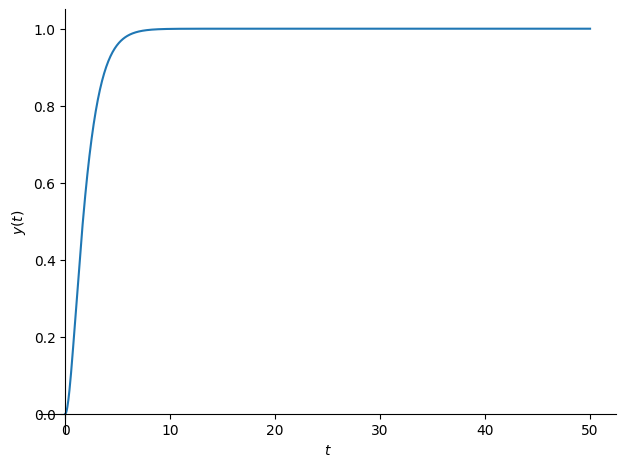

In [46]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((50/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

In [47]:
#Frecuencia  no Amortiguada
wn.subs(RLC)

1

In [48]:
#Frecuencia Amortiguada
wd.subs(RLC)

0

In [49]:
#Tiempo de levantamiento
z=xi.subs(RLC)
tr=tiempo_levantamiento(wn, z)
tr.subs(RLC)

2.20000000000000

In [50]:
#Tiempo Pico
tp.subs(RLC)

zoo

In [51]:
#Tiempo establecimiento
ts.subs(RLC)

3

**sobreamortiguado**

In [52]:
#evaluar valores RLC
RLC = {R: 4, L: ('1'), C: ('1')}#valores utilizados para la simulación
H.subs(RLC)

     1      
────────────
 2          
s  + 4⋅s + 1

In [53]:
print('p1=',p1.subs(RLC))
print('p2=',p2.subs(RLC))
print('xi=',xi.subs(RLC))
print('omega_n=',wn.subs(RLC))

p1= -1/8 + 3*sqrt(7)*I/8
p2= -1/8 - 3*sqrt(7)*I/8
xi= 2
omega_n= 1


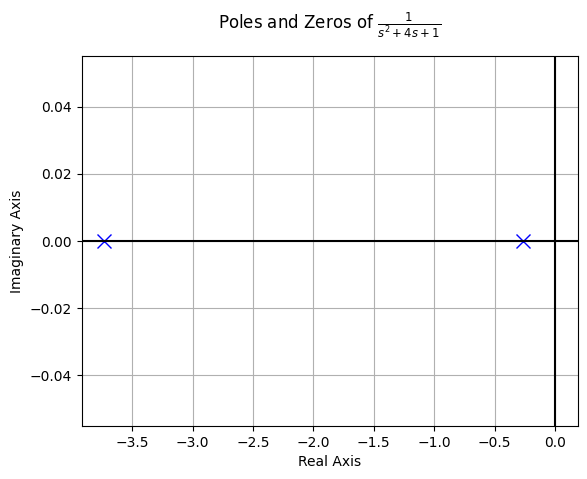

In [54]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
num,den=sym.fraction(H.subs(RLC))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

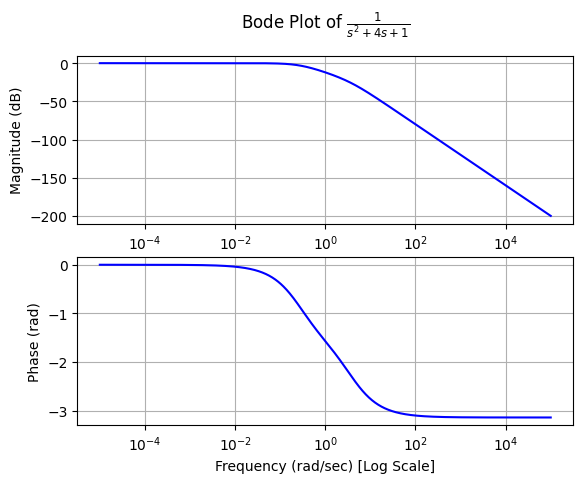

In [68]:
#Diagrma de Bode
control.bode_plot(tf1)

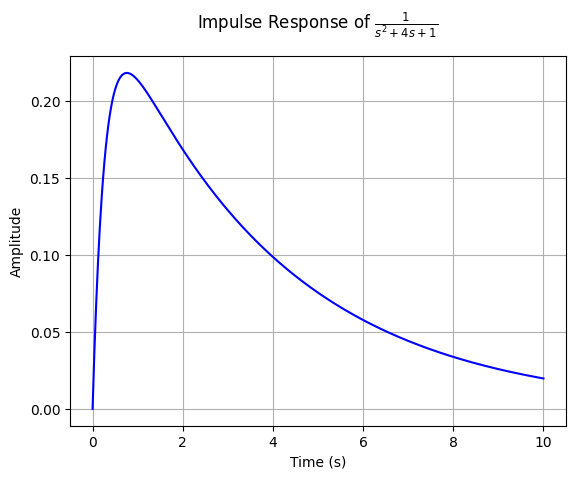

In [69]:
#Respuesta al Impulso
control.impulse_response_plot(tf1)

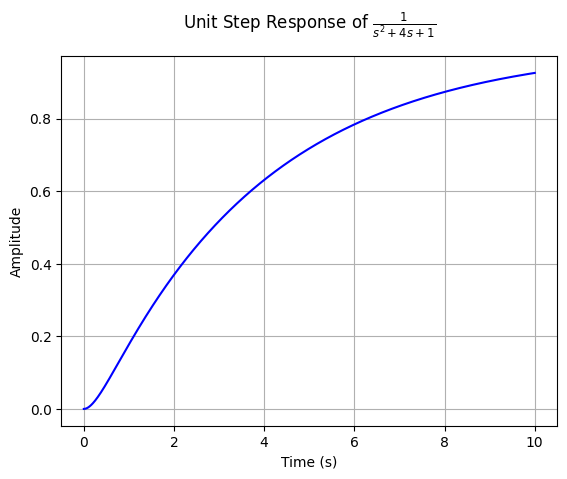

In [70]:
#Respuesta al Escalon
control.step_response_plot(tf1)

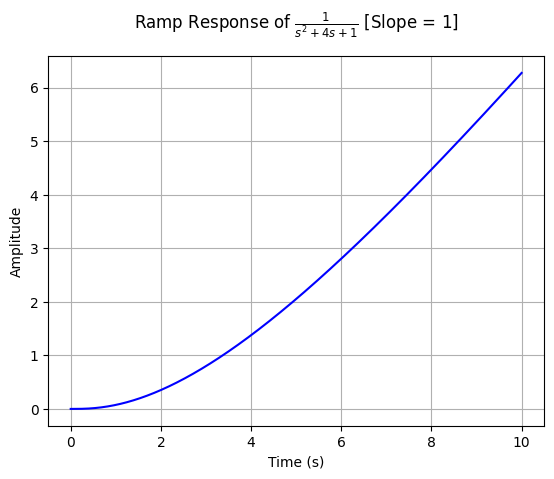

In [71]:
#Respuesta a la rampa
control.ramp_response_plot(tf1)

In [55]:
#salida según entrada de interés
Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

       1        
────────────────
  ⎛ 2       R⋅s⎞
s⋅⎜s  + 1 + ───⎟
  ⎝          L ⎠

In [56]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp


     L⋅s + R       1
- ────────────── + ─
     2             s
  L⋅s  + L + R⋅s    

In [57]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

     -R⋅t     ⎛     ___________⎞                                            
     ─────    ⎜    ╱    2    2 ⎟                                            
      2⋅L     ⎜t⋅╲╱  4⋅L  - R  ⎟        -R⋅t                                
  R⋅ℯ     ⋅sin⎜────────────────⎟        ─────    ⎛    _________   _________⎞
              ⎝      2⋅L       ⎠         2⋅L     ⎜t⋅╲╱ 2⋅L - R ⋅╲╱ 2⋅L + R ⎟
- ────────────────────────────── + 1 - ℯ     ⋅cos⎜─────────────────────────⎟
             ___________                         ⎝           2⋅L           ⎠
            ╱    2    2                                                     
          ╲╱  4⋅L  - R                                                      

In [58]:
#Modelo en el tiempo en función de RLC - substituir valores
Ye = Yp.subs(RLC).apart(s)
Ye


     s + 4       1
- ──────────── + ─
   2             s
  s  + 4⋅s + 1    

In [59]:
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

          -2⋅t                              
    2⋅√3⋅ℯ    ⋅sinh(√3⋅t)    -2⋅t           
1 - ───────────────────── - ℯ    ⋅cosh(√3⋅t)
              3                             

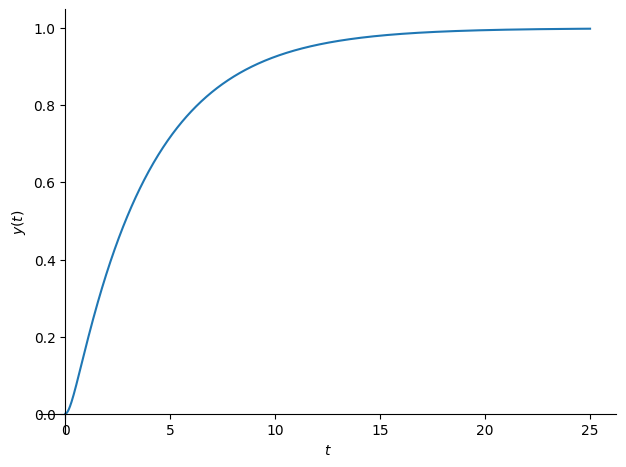

In [60]:
#Gráfica de salida en el tiempo
sym.plot(yt,(t,0,float((50/xi*wn).subs(RLC))),xlabel='$t$', ylabel='$y(t)$')
plt.show()

In [61]:
#Frecuencia  no Amortiguada
wn.subs(RLC)

1

In [62]:
#Frecuencia Amortiguada
wd.subs(RLC)

√3⋅ⅈ

In [63]:
#Tiempo de levantamiento
z=xi.subs(RLC)
tr=tiempo_levantamiento(wn, z)
tr.subs(RLC)

8.21051177665153

In [64]:
#Tiempo Pico
tp.subs(RLC)

-√3⋅ⅈ⋅π 
────────
   3    

In [65]:
#Tiempo establecimiento
ts.subs(RLC)

3/2